# CUSTOMER SENTIMENT ANALYSIS

# Importing the libraries and Dataset

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#dataset
df=pd.read_csv(r"C:\Users\HIFZA ANSARI\Downloads\archive (8)\Customer_Sentiment.csv")

In [5]:
df

,customer_id,gender,age_group,region,product_category,purchase_channel,platform,customer_rating,review_text,sentiment,response_time_hours,issue_resolved,complaint_registered
0,1,male,60+,north,automobile,online,flipkart,1,very disappointed with the quality.,negative,46,yes,yes
1,2,other,46-60,central,books,online,swiggy instamart,5,fast delivery and great packaging.,positive,5,yes,no
2,3,female,36-45,east,sports,online,facebook marketplace,1,very disappointed with the quality.,negative,38,yes,yes
3,4,female,18-25,central,groceries,online,zepto,2,product stopped working after few days.,negative,16,yes,yes
4,5,female,18-25,east,electronics,online,croma,3,neutral about the quality.,neutral,15,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,24996,female,36-45,south,beauty,online,lenskart,1,very disappointed with the quality.,negative,40,yes,yes
24996,24997,other,60+,central,automobile,online,flipkart,5,"amazing experience, highly recommend!",positive,25,yes,no
24997,24998,male,18-25,south,beauty,online,ajio,4,fast delivery and great packaging.,positive,9,yes,no
24998,24999,female,26-35,central,automobile,online,snapdeal,5,great value for money.,positive,65,no,no


# Explore data

In [6]:
df.head(5)

,customer_id,gender,age_group,region,product_category,purchase_channel,platform,customer_rating,review_text,sentiment,response_time_hours,issue_resolved,complaint_registered
0,1,male,60+,north,automobile,online,flipkart,1,very disappointed with the quality.,negative,46,yes,yes
1,2,other,46-60,central,books,online,swiggy instamart,5,fast delivery and great packaging.,positive,5,yes,no
2,3,female,36-45,east,sports,online,facebook marketplace,1,very disappointed with the quality.,negative,38,yes,yes
3,4,female,18-25,central,groceries,online,zepto,2,product stopped working after few days.,negative,16,yes,yes
4,5,female,18-25,east,electronics,online,croma,3,neutral about the quality.,neutral,15,yes,no


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customer_id           25000 non-null  int64 
 1   gender                25000 non-null  object
 2   age_group             25000 non-null  object
 3   region                25000 non-null  object
 4   product_category      25000 non-null  object
 5   purchase_channel      25000 non-null  object
 6   platform              25000 non-null  object
 7   customer_rating       25000 non-null  int64 
 8   review_text           25000 non-null  object
 9   sentiment             25000 non-null  object
 10  response_time_hours   25000 non-null  int64 
 11  issue_resolved        25000 non-null  object
 12  complaint_registered  25000 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.5+ MB


In [9]:
df.isnull().sum()

customer_id             0
gender                  0
age_group               0
region                  0
product_category        0
purchase_channel        0
platform                0
customer_rating         0
review_text             0
sentiment               0
response_time_hours     0
issue_resolved          0
complaint_registered    0
dtype: int64

In [10]:
df.describe()

,customer_id,customer_rating,response_time_hours
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,3.002480,36.023480
std,7217.022701,1.404647,20.597941
min,1.000000,1.000000,1.000000
25%,6250.750000,2.000000,18.000000
50%,12500.500000,3.000000,36.000000
75%,18750.250000,4.000000,54.000000
max,25000.000000,5.000000,71.000000


# DATA CLEANING

 # Customer distribution

In [ ]:
#By Gender, Age_group, Region

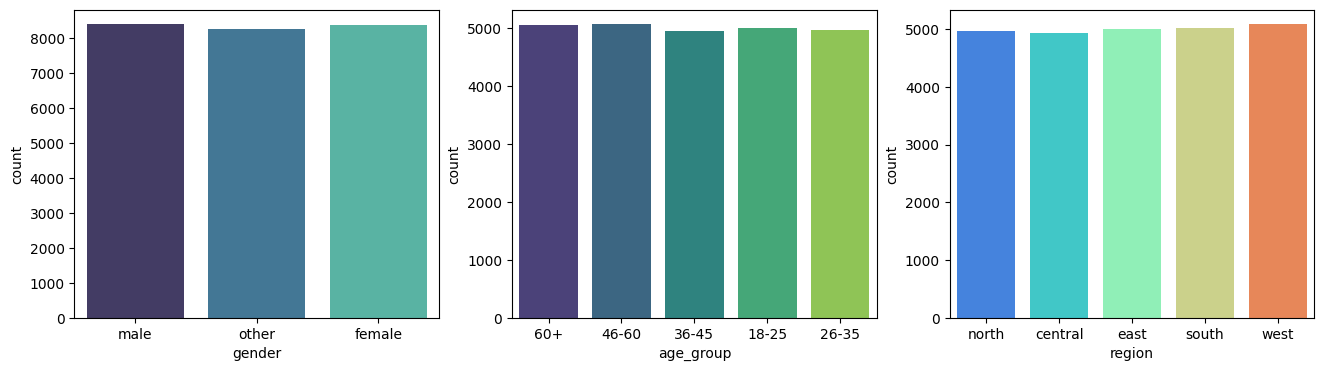

In [22]:
fig, ax = plt.subplots(1,3, figsize=(16,4))
sns.countplot(data=df, x="gender", ax=ax[0],palette='mako')
sns.countplot(data=df, x="age_group", ax=ax[1],palette='viridis')
sns.countplot(data=df, x="region", ax=ax[2],palette='rainbow')
plt.show()


# Top 5 performing products

In [24]:
count=df['product_category'].value_counts().head(5)
count

product_category
groceries     2858
automobile    2833
books         2812
travel        2811
fashion       2782
Name: count, dtype: int64

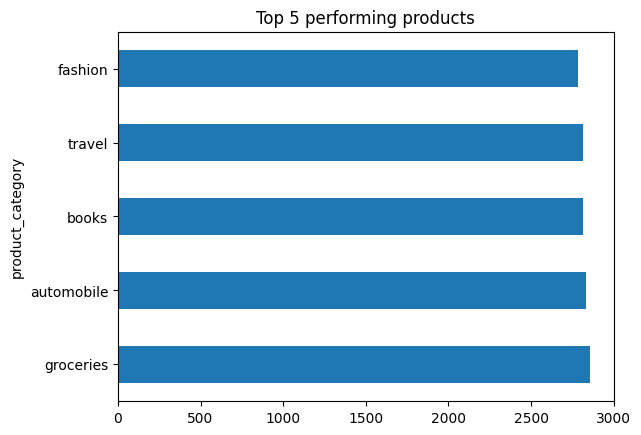

In [54]:
count.plot(kind='barh', fig=(18,4) )
plt.title('Top 5 performing products')
plt.show()

# Platform Preference

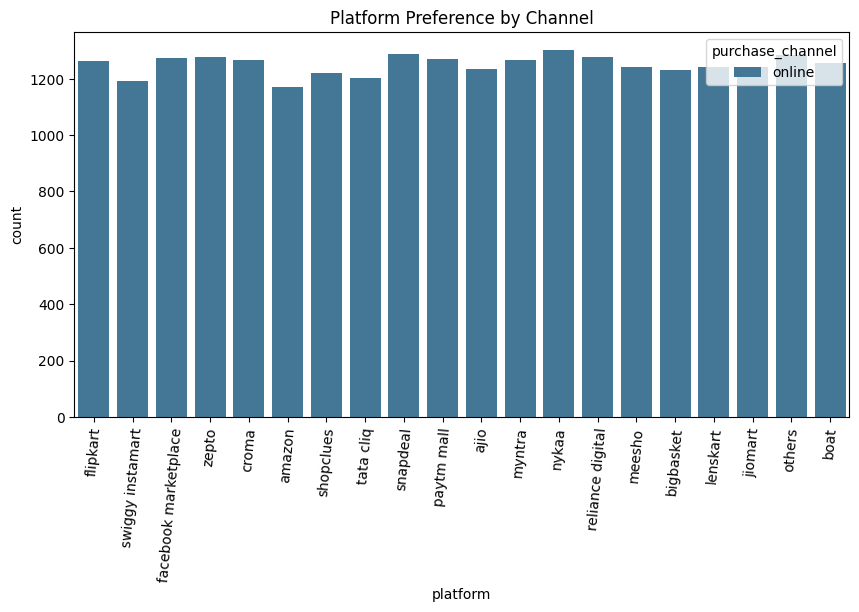

In [53]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="platform", hue="purchase_channel",palette='mako')
plt.title("Platform Preference by Channel")
plt.xticks(rotation=85)
plt.show()

# Overall Satisfaction

In [ ]:
#Rating

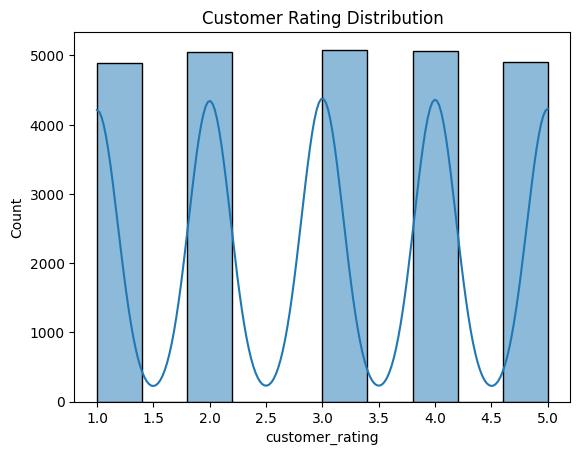

In [56]:
sns.histplot(df['customer_rating'], kde=True, bins=10)
plt.title("Customer Rating Distribution")
plt.show()


In [ ]:
#Customer sentiment

In [58]:
sentiment=df['sentiment'].value_counts()
sentiment

sentiment
positive    9978
negative    9937
neutral     5085
Name: count, dtype: int64

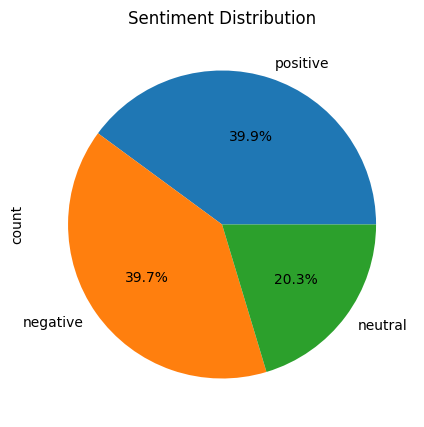

In [59]:
plt.figure(figsize=(5,5))
sentiment.plot(kind='pie', autopct="%1.1f%%")
plt.title("Sentiment Distribution")
plt.show()


# Sentiment by region

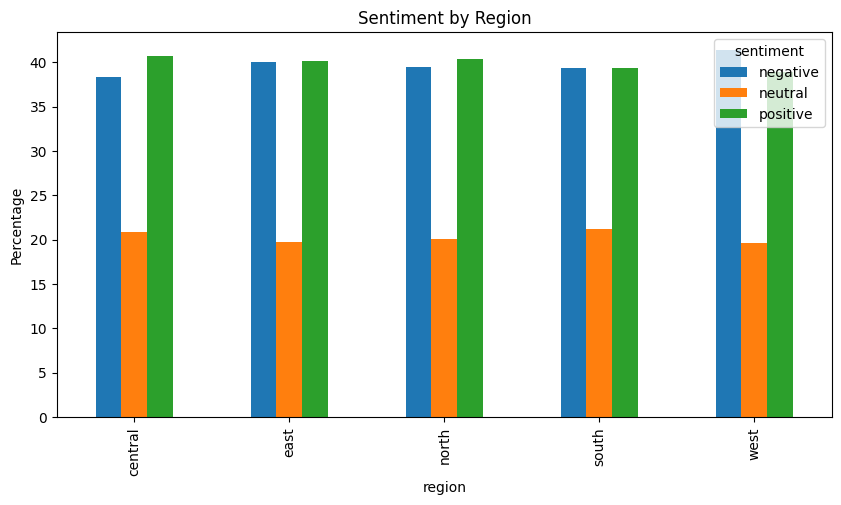

In [60]:
sent_region = pd.crosstab(df['region'], df['sentiment'], normalize='index') * 100
sent_region.plot(kind='bar', figsize=(10,5))
plt.title("Sentiment by Region")
plt.ylabel("Percentage")
plt.show()


# Rating vs Platform

In [68]:
plat_rating= df.groupby('platform')['customer_rating'].mean().sort_values(ascending=False)
plat_rating

platform
boat                    3.049324
tata cliq               3.039134
amazon                  3.033276
myntra                  3.033149
facebook marketplace    3.030660
ajio                    3.027553
reliance digital        3.026583
paytm mall              3.018096
meesho                  3.016935
swiggy instamart        3.016779
zepto                   3.011737
jiomart                 3.010484
others                  2.993002
lenskart                2.974214
nykaa                   2.973098
snapdeal                2.968192
shopclues               2.965574
bigbasket               2.962602
croma                   2.961295
flipkart                2.942247
Name: customer_rating, dtype: float64

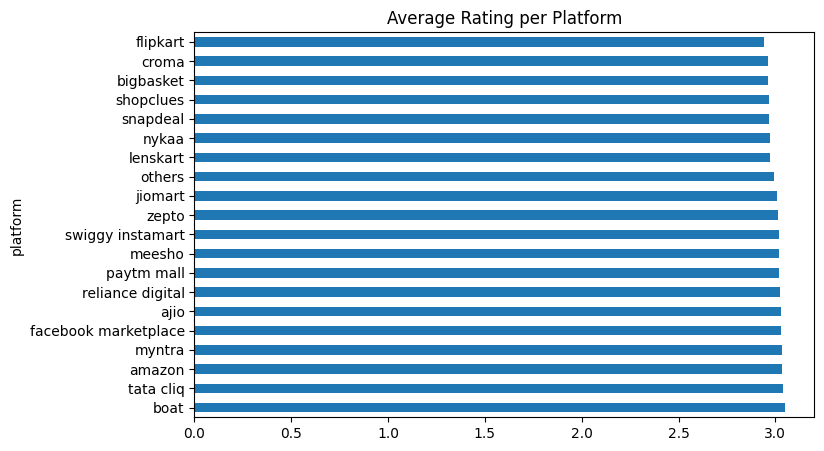

In [69]:
plt.figure(figsize=(8,5))
plat_rating.plot(kind='barh')
plt.title("Average Rating per Platform")
plt.show()


# Complaint Rate

In [86]:
com_reg=df['complaint_registered'].value_counts()
com_reg

complaint_registered
no     15063
yes     9937
Name: count, dtype: int64

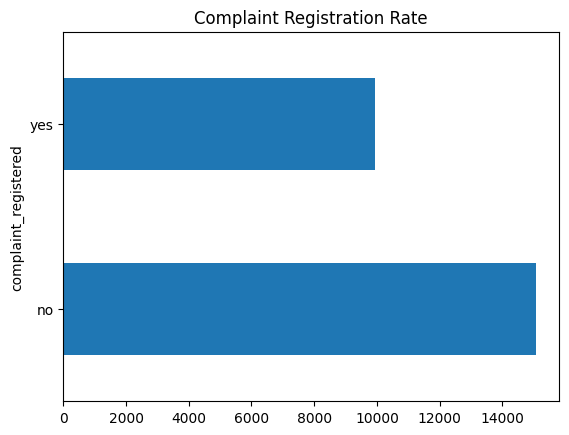

In [73]:
com_reg.plot(kind='barh')
plt.title("Complaint Registration Rate")
plt.show()


# Resolution Effectiveness

In [74]:
resolved = df[df['complaint_registered']=="yes"]['issue_resolved'].value_counts()
resolved

issue_resolved
yes    6620
no     3317
Name: count, dtype: int64

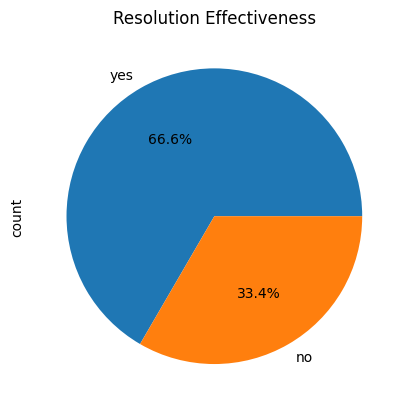

In [80]:

resolved.plot(kind='pie', autopct="%1.1f%%")
plt.title("Resolution Effectiveness")
plt.show()


# Service Speed vss Resolution outcome

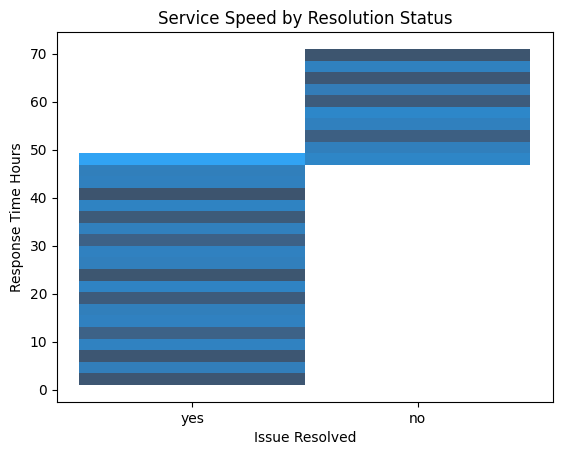

In [84]:
sns.histplot(data=df, x="issue_resolved", y="response_time_hours")
plt.title("Service Speed by Resolution Status")
plt.xlabel('Issue Resolved')
plt.ylabel('Response Time Hours')
plt.show()


# KEY INSIGHTS ✍

West region shows highest negative sentiment and needs improvement.

Flipkart Platform has lowest average rating because of delays or poor packaging.

Faster response time leads to more positive resolution outcomes.